In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
new_data = data.iloc[:,[0,2]]
new_data.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [4]:
from sklearn import preprocessing

new_data2 = preprocessing.normalize(new_data)
new_data3 = pd.DataFrame(new_data2)
new_data3.head()

,0,1
0,0.562877,0.826541
1,0.470371,0.882469
2,0.646977,0.762509
3,0.823838,0.566825
4,0.742371,0.669989


In [5]:
from sklearn.cluster import KMeans
wcss = []
#kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
for k in range(1,15):   # k değeri 1'den 15'e kadar
    kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10,random_state=0 )  #k tane cluster yap
    kmeans.fit(new_data3) #datayı kmeans'e göre fit et
    wcss.append(kmeans.inertia_) # wcss metriğinin içine her k değeri için wcss değerini bul

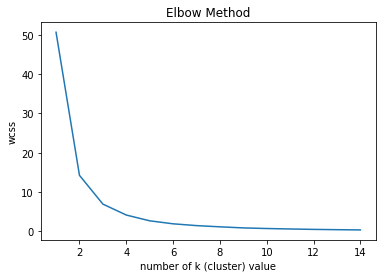

In [6]:
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [7]:
kmeans2 = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )  #k tane cluster yap
# datayı fit et daha sonra fit ettiğin kmeans2 modelini datanın üzerinde uygula clusterları oluştur
clusters = kmeans2.fit_predict(new_data3)

new_data3[2] = clusters

age=new_data3[0]
bmi=new_data3[1]
#children=new_data3[2]
#charges=new_data3[3]

dictionary = {"age":age,"bmi":bmi}
data = pd.DataFrame(dictionary)


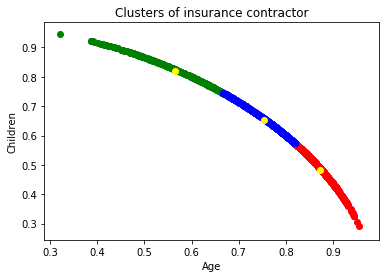

In [8]:
data["label"] = clusters

plt.scatter(data.age[data.label == 0 ],data.bmi[data.label == 0],color = "red")
plt.scatter(data.age[data.label == 1 ],data.bmi[data.label == 1],color = "green")
plt.scatter(data.age[data.label == 2 ],data.bmi[data.label == 2],color = "blue")
plt.scatter(data.age[data.label == 3 ],data.bmi[data.label == 3],color = "pink")
plt.scatter(data.age[data.label == 4 ],data.bmi[data.label == 4],color = "orange")
plt.scatter(data.age[data.label == 5 ],data.bmi[data.label == 5],color = "purple")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow") #cendroid merkezler

plt.title('Clusters of insurance contractor')
plt.xlabel('Age')
plt.ylabel('Children')
plt.show()